In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "http://51.91.120.89/extras/veturilo.csv"
df = pd.read_csv(url, parse_dates=True, usecols=["ts","qnty"], index_col="ts")
df.head()

,qnty
ts,
2020-07-10 18:55:00,2
2020-07-10 19:00:00,2
2020-07-10 19:05:00,2
2020-07-10 19:10:00,2
2020-07-10 19:15:00,12


In [3]:
df.qnty.unique()

array(['2', '12', '7', '9', '8', '6', '5', '4', '1', '10', '11', '0', '3',
       '16', '17', '14', '15', '13', '18', '19', '?'], dtype=object)

In [4]:
df.qnty = df.qnty.replace("?", np.NaN).fillna(method='ffill').astype('uint8')

<Axes: xlabel='ts'>

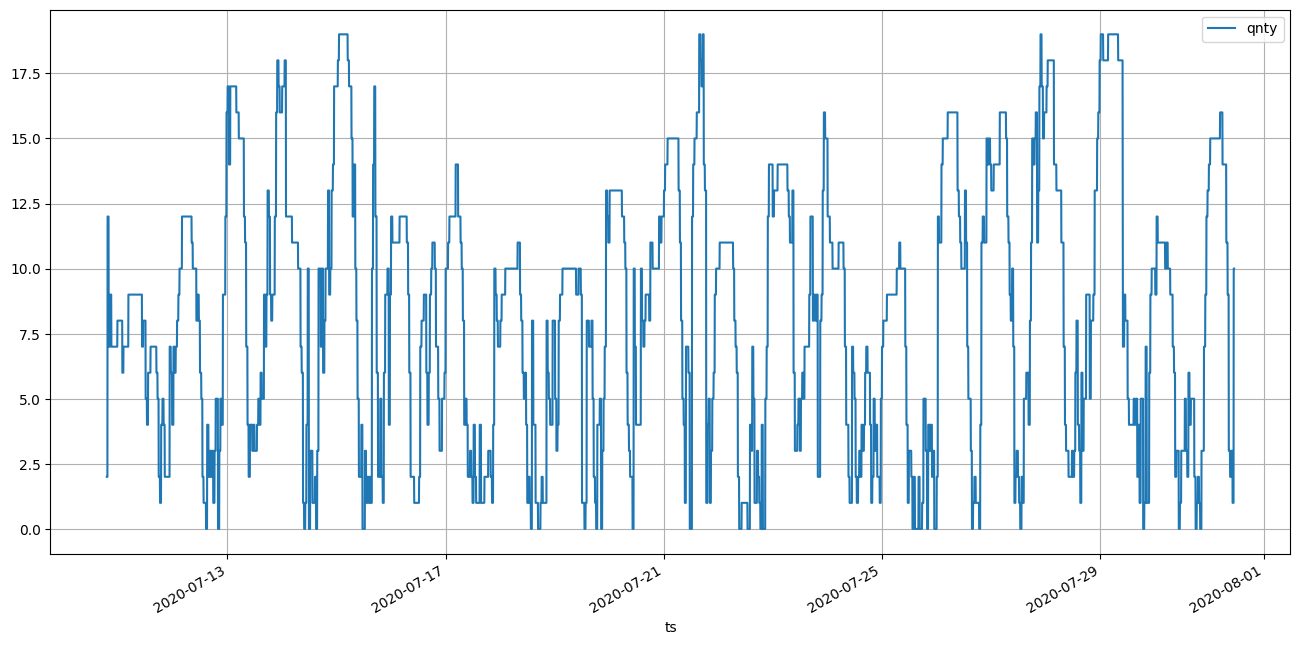

In [5]:
df.plot(grid=True, figsize=(16,8))

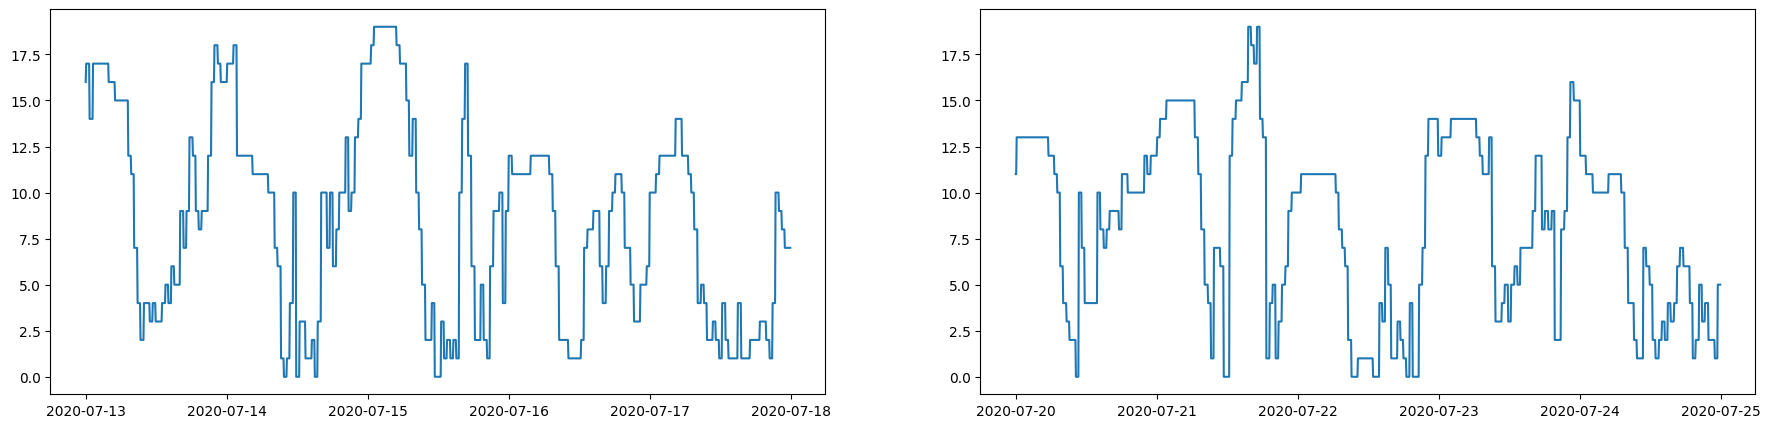

In [6]:
plt.subplots(1, 2, figsize=(22,5))

df_13_17 = df.loc["2020-07-13":"2020-07-17"]
plt.subplot(1, 2, 1)
plt.plot(df_13_17.index, df_13_17.qnty)

df_20_24 = df.loc["2020-07-20":"2020-07-24"]
plt.subplot(1, 2, 2)
plt.plot(df_20_24.index, df_20_24.qnty)


In [7]:
from statsmodels.stats.stattools import durbin_watson

1.9710791399273386


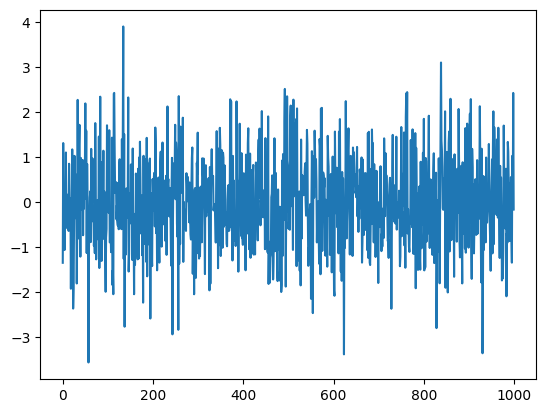

In [9]:
y = np.random.normal(0, 1, 1000)
plt.plot(y)
print(durbin_watson(y))

0.0100449718852041


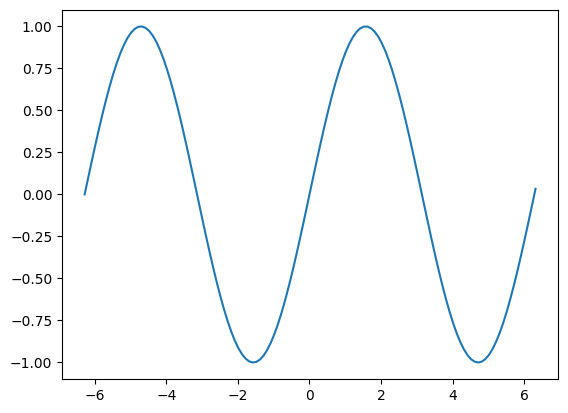

In [12]:
x = np.arange(-2*np.pi, 2*np.pi+0.1, 0.1)
y = np.sin(x)
plt.plot(x, y)
print(durbin_watson(y))

In [13]:
df.tail()

,qnty
ts,
2020-07-31 10:35:00,1
2020-07-31 10:40:00,1
2020-07-31 10:45:00,10
2020-07-31 10:50:00,10
2020-07-31 10:55:00,10


In [14]:
from prophet import Prophet

<Axes: xlabel='ts'>

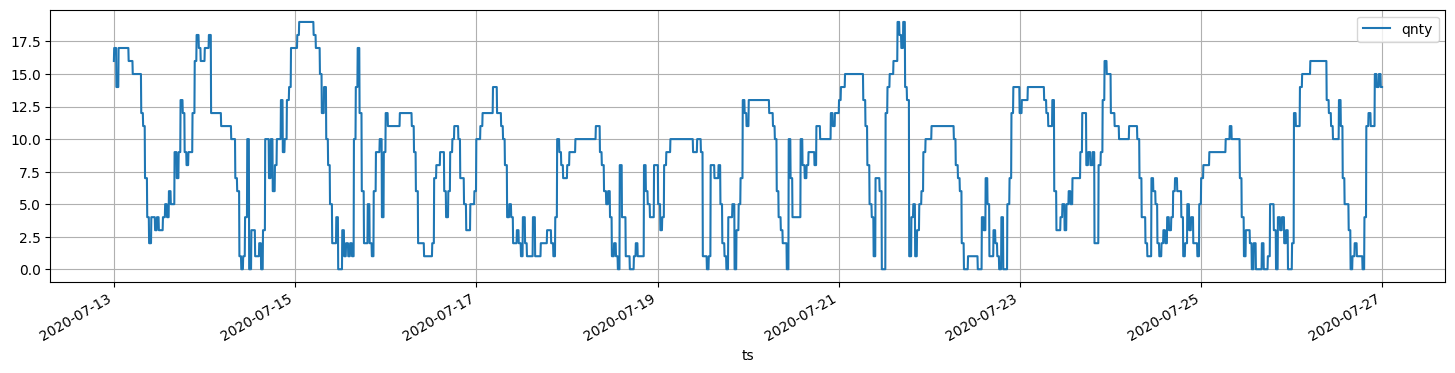

In [20]:
df_predict = df.loc["2020-07-13":"2020-07-26"]
df_predict.plot(grid=True, figsize=(18,4))

In [21]:
df_predict.reset_index(inplace=True)
df_predict.columns = ['ds','y']
df_predict.head()

,ds,y
0,2020-07-13 00:00:00,16
1,2020-07-13 00:05:00,17
2,2020-07-13 00:10:00,17
3,2020-07-13 00:15:00,17
4,2020-07-13 00:20:00,17


In [22]:
model = Prophet()
model.fit(df_predict)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnzvdnij/83xkifjc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnzvdnij/fe_lnlvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99625', 'data', 'file=/tmp/tmpfnzvdnij/83xkifjc.json', 'init=/tmp/tmpfnzvdnij/fe_lnlvc.json', 'output', 'file=/tmp/tmpfnzvdnij/prophet_modelwio_fa85/prophet_model-20230418095631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:56:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_future = model.make_future_dataframe(freq='H', periods=48)
df_future

In [ ]:
df_forecast = model.predict(df_future)
df_forecast

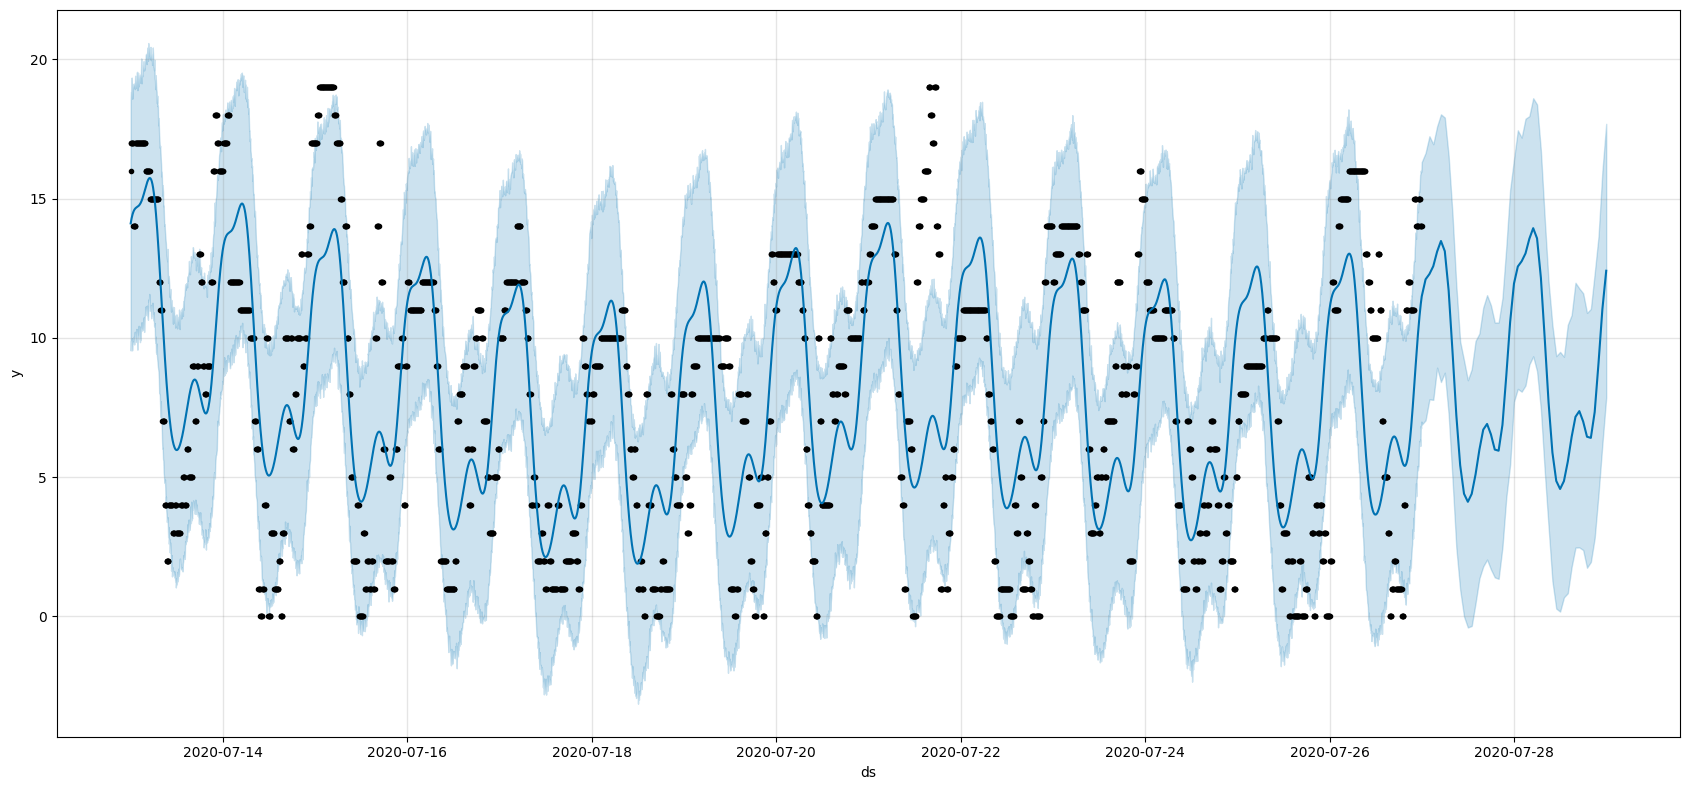

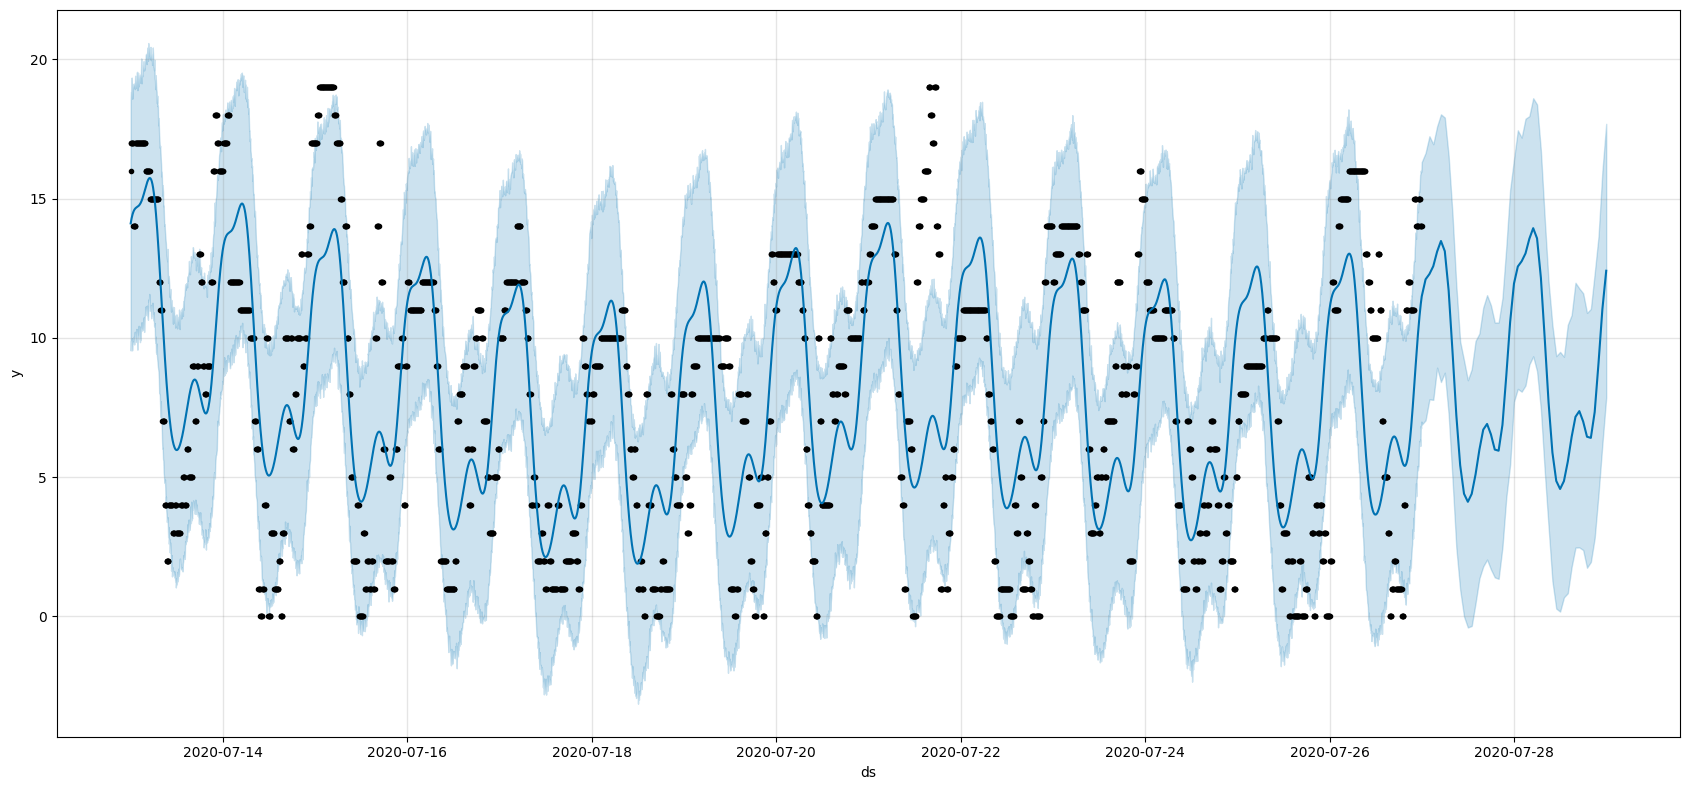

In [25]:
model.plot(df_forecast, figsize=(17,8))

In [26]:
df_27_28 = df.loc["2020-07-27":"2020-07-28"]
df_27_28.head()

,qnty
ts,
2020-07-27 00:00:00,14
2020-07-27 00:05:00,13
2020-07-27 00:10:00,13
2020-07-27 00:15:00,13
2020-07-27 00:20:00,13


In [31]:
df_tmp = df_forecast[ ["ds","yhat","yhat_lower","yhat_upper"] ].set_index("ds").loc["2020-07-27":"2020-07-28"]
df_tmp.head()

,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27 00:55:00,12.098627,7.038720,16.636148
2020-07-27 01:55:00,12.288112,7.790843,17.235334
2020-07-27 02:55:00,12.569176,7.773385,16.948863
2020-07-27 03:55:00,13.093754,8.928385,17.588623
2020-07-27 04:55:00,13.474935,8.413026,18.021506


In [32]:
df_res = pd.concat([df_27_28, df_tmp], axis=1)
df_res.head()

,qnty,yhat,yhat_lower,yhat_upper
2020-07-27 00:00:00,14,NaN,NaN,NaN
2020-07-27 00:05:00,13,NaN,NaN,NaN
2020-07-27 00:10:00,13,NaN,NaN,NaN
2020-07-27 00:15:00,13,NaN,NaN,NaN
2020-07-27 00:20:00,13,NaN,NaN,NaN


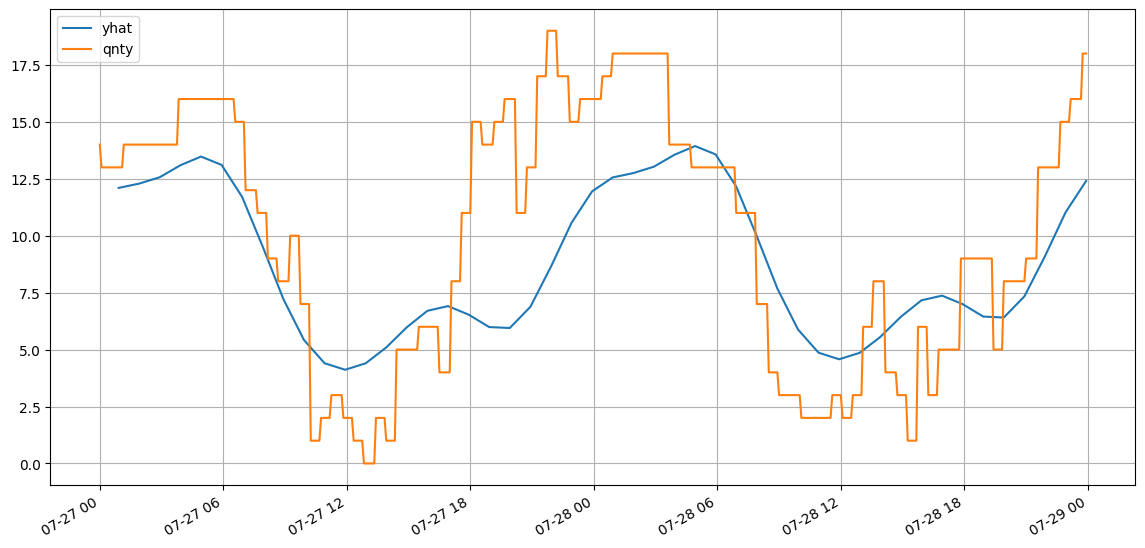

In [35]:
df_res.yhat[ ~df_res.yhat.isna() ].plot()
df_res.qnty.plot(grid=True, figsize=(14,7))
plt.legend()